In [1]:
import pandas as pd
import seaborn as sns

1. How many records are present in the dataset? Print the metadata information of the dataset.
2. How many movies got released in each genre? Which genre had highest number of releases? Sort 
number of releases in each genre in descending order.
3. How many movies in each genre got released in different release times like long weekend, festive 
season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column 
called month from ReleaseDate column.)
5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with 
budget of 25 crore or more?
6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on 
investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate 
the average ROI for different release times.
8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the 
plot to conclude if the most movies are high or low budgeted movies.
9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre 
typically sees higher ROIs?
10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or 
negative?
11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies 
to compare.
12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, 
YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap

In [3]:
b = pd.read_csv('C:/Users/VMARA/OneDrive/Desktop/Python Codes/Machine Learning (Codes and Data Files)/Data/bollywood.csv')

In [9]:
metadata = b.info()
b.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1


In [5]:
genre_movie_count = b.groupby('Genre')['MovieName'].count()

In [7]:
genre_movie_count.sort_values(ascending=False)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: MovieName, dtype: int64

In [8]:
pd.crosstab(b['Genre'],b['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [10]:
b['Month'] = b['Release Date'].str.slice(-6,-3)

In [11]:
b.head(5)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul


In [13]:
b.groupby('Month')['MovieName'].count()

Month
Apr    11
Aug     8
Dec     2
Feb    16
Jan    20
Jul    16
Jun    10
Mar    19
May    18
Nov    10
Oct     9
Sep    10
Name: MovieName, dtype: int64

In [26]:
b[b['Budget'] > 25]['Month'].value_counts(ascending=False)

Feb    9
Aug    7
Jan    6
Mar    6
Nov    6
Jul    6
Jun    5
Apr    4
Sep    4
Oct    4
May    3
Dec    2
Name: Month, dtype: int64

In [27]:
b['ROI'] = (b['BoxOfficeCollection']-b['Budget'])/b['Budget']

In [33]:
b[['ROI', 'MovieName']].sort_values('ROI', ascending=False)[0:10]

,ROI,MovieName
64,8.166667,Aashiqui 2
89,7.647059,PK
132,7.514286,Grand Masti
135,7.500000,The Lunchbox
87,6.240000,Fukrey
58,5.933333,Mary Kom
128,5.666667,Shahid
37,5.500000,Humpty Sharma Ki Dulhania
101,4.466667,Bhaag Milkha Bhaag
115,4.266667,Chennai Express


In [40]:
b.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64

In [41]:
b.groupby(['ReleaseTime','Genre'])['ROI'].mean()

ReleaseTime  Genre    
FS            Drama       1.977083
             Action       1.795031
             Comedy       1.059127
             Romance     -0.248990
             Thriller     0.207917
HS            Drama       1.840707
             Action       0.210000
             Comedy      -0.078133
             Romance      1.073175
             Thriller     0.812500
LW            Drama       2.064000
             Action       0.139811
             Comedy       1.712181
             Romance      0.834038
             Thriller     0.827586
             Thriller     1.700000
N             Drama       1.103932
             Action       0.218134
             Action      -0.602028
             Comedy       0.740633
             Romance      1.284782
             Thriller     0.096863
             Thriller    -0.217500
Name: ROI, dtype: float64

c:\Users\VMARA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Budget', ylabel='Density'>

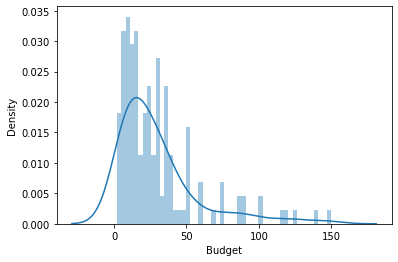

In [45]:
sns.distplot(b['Budget'],bins=50)

<AxesSubplot:xlabel='Genre', ylabel='ROI'>

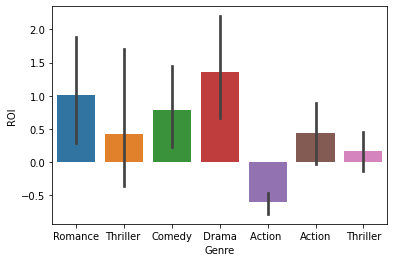

In [46]:
sns.barplot(x=b['Genre'],y=b['ROI'])

In [53]:
b.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'Month', 'ROI'],
      dtype='object')

In [54]:
bfeatures = ['BoxOfficeCollection', 'YoutubeLikes']

In [55]:
bfeatures

['BoxOfficeCollection', 'YoutubeLikes']

In [57]:
b[bfeatures].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


<AxesSubplot:>

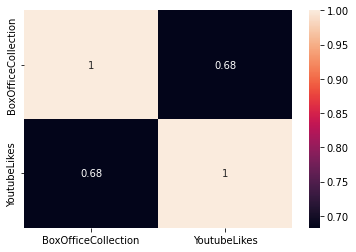

In [59]:
sns.heatmap(b[bfeatures].corr(), annot=True)

In [97]:
bgraph = b.groupby('Genre')['YoutubeLikes'].mean().sort_values(ascending=False)

In [107]:
bgraph1 = pd.DataFrame(bgraph).reset_index()

In [108]:
bgraph1

,Genre,YoutubeLikes
0,Action,18340.666667
1,Drama,7973.628571
2,Romance,7089.640000
3,Action,5573.000000
4,Thriller,5096.000000
5,Thriller,4924.000000
6,Comedy,4784.722222


<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

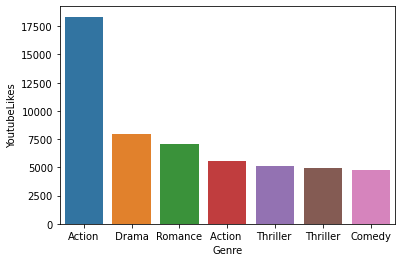

In [109]:
sns.barplot(x='Genre',y='YoutubeLikes', data=bgraph1)

In [110]:
list(b.columns)

['SlNo',
 'Release Date',
 'MovieName',
 'ReleaseTime',
 'Genre',
 'Budget',
 'BoxOfficeCollection',
 'YoutubeViews',
 'YoutubeLikes',
 'YoutubeDislikes',
 'Month',
 'ROI']

In [111]:
feat = list(b.columns)

<AxesSubplot:>

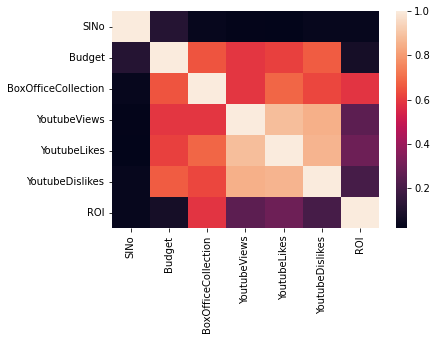

In [112]:
sns.heatmap(b[feat].corr())